Importing All Required Libraries

In [137]:
import yfinance as yf
import mplfinance as mpf  # type: ignore
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [290]:
data = yf.download("AAPL", period="5y")
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-02-26,118.106697,121.603337,118.048252,119.402105,164560400
2021-03-01,124.466904,124.603262,119.596925,120.531960,116307900
2021-03-02,121.866333,125.372716,121.759193,125.070779,102260900
2021-03-03,118.885902,122.440988,118.671622,121.564390,112966300
2021-03-04,117.006096,120.385862,115.535368,118.583972,178155000


In [291]:
data = data.reset_index(drop=True)

In [292]:
# Daily Return
data["Return"] = data["Close"].pct_change()

# 5-day Moving Average
data["MA5"] = data["Close"].rolling(5).mean()

# 10-day Moving Average
data["MA10"] = data["Close"].rolling(10).mean()

In [293]:
data["Target"] = (data["Close"].shift(-1) > data["Close"]).astype(int)

In [294]:
data = data.dropna()

In [296]:
X = data[["Return", "MA5", "MA10"]]
y = data["Target"]

In [297]:
X.head()

Price,Return,MA5,MA10
Ticker,,,
9,0.016503,117.037245,118.551816
10,-0.007626,116.961273,118.529412
11,0.024457,118.447594,118.159293
12,0.012743,119.320299,118.203123
13,-0.006451,120.251439,118.466102


In [298]:
y.head()

9     0
10    1
11    1
12    0
13    0
Name: Target, dtype: int64

In [299]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [300]:
model = RandomForestClassifier(n_estimators=210, random_state=42)
model.fit(X_train, y_train)

,n_estimators,210
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [301]:
predictions = model.predict(X_test)

In [302]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.508
Precision: 0.5473684210526316
Recall: 0.3939393939393939
F1 Score: 0.4581497797356828
Confusion Matrix:
 [[75 43]
 [80 52]]


In [303]:
latest_data = X.iloc[-1:].values
probability_up = model.predict_proba(latest_data)[0][1]

print(f"Probability stock goes UP tomorrow:{probability_up*100}%")

Probability stock goes UP tomorrow:21.428571428571427%


In [164]:
print(data.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [304]:
data.columns = data.columns.get_level_values(0)

[*********************100%***********************]  1 of 1 completed


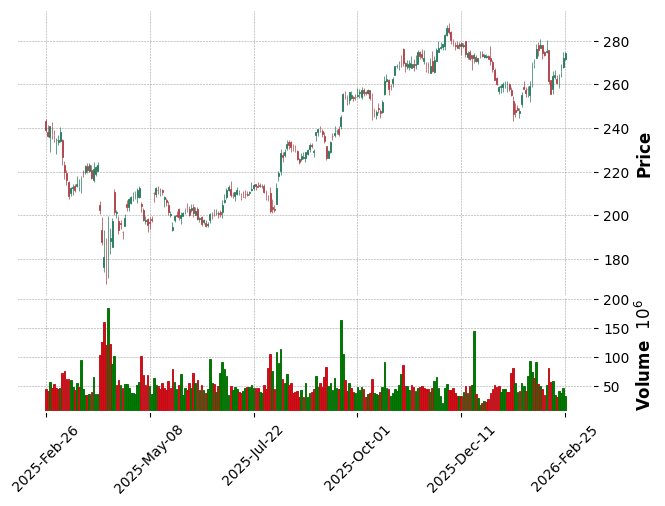

In [305]:
import yfinance as yf
import mplfinance as mpf # type: ignore

data = yf.download("AAPL", period="1y")

# Fix MultiIndex columns
data.columns = data.columns.get_level_values(0)

mpf.plot(data, type='candle', style="charles", volume=True)

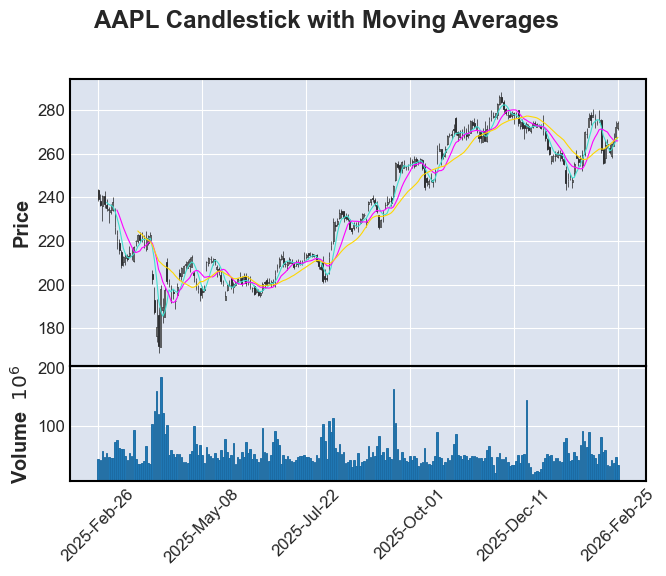

In [306]:
mpf.plot(
    data,
    type='candle',
    mav=(5,10,20),
    volume=True,
    title='AAPL Candlestick with Moving Averages'
)

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

tickers = ["AAPL", "TSLA", "GOOGL"]

for ticker in tickers:
    print(f"\n================ {ticker} ================")

    # Download Data
    data = yf.download(ticker, period="5y")
    data = data.reset_index(drop=True)

    # Feature Engineering
    data["Return"] = data["Close"].pct_change()
    data["MA5"] = data["Close"].rolling(5).mean()
    data["MA10"] = data["Close"].rolling(10).mean()

    # Target (1 if tomorrow is up, else 0)
    data["Target"] = (data["Close"].shift(-1) > data["Close"]).astype(int)

    data = data.dropna()

    X = data[["Return", "MA5", "MA10"]]
    y = data["Target"]

    # Time-based split (important for stocks)
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Model
    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    predictions = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)

    # Tomorrow probability
    latest_data = X.iloc[-1:].values
    probability_up = model.predict_proba(latest_data)[0][1]

    # Print Results
    print("Accuracy  :", round(accuracy, 4))
    print("Precision :", round(precision, 4))
    print("Recall    :", round(recall, 4))
    print("F1 Score  :", round(f1, 4))
    print("Confusion Matrix:\n", conf_matrix)
    print("Probability UP Tomorrow:", round(probability_up * 100, 2), "%")


================ AAPL ================


[*********************100%***********************]  1 of 1 completed


Accuracy  : 0.476
Precision : 0.5053
Recall    : 0.3636
F1 Score  : 0.4229
Confusion Matrix:
 [[71 47]
 [84 48]]
Probability UP Tomorrow: 15.0 %

================ TSLA ================


[*********************100%***********************]  1 of 1 completed


Accuracy  : 0.516
Precision : 0.5625
Recall    : 0.3435
F1 Score  : 0.4265
Confusion Matrix:
 [[84 35]
 [86 45]]
Probability UP Tomorrow: 26.5 %

================ GOOGL ================


[*********************100%***********************]  1 of 1 completed


Accuracy  : 0.5
Precision : 0.5373
Recall    : 0.5333
F1 Score  : 0.5353
Confusion Matrix:
 [[53 62]
 [63 72]]
Probability UP Tomorrow: 54.5 %



Plotting AAPL...


[*********************100%***********************]  1 of 1 completed


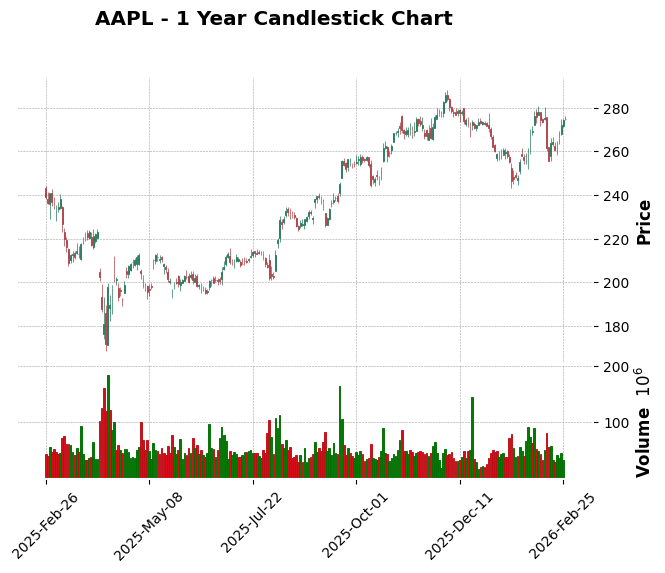


Plotting TSLA...


[*********************100%***********************]  1 of 1 completed


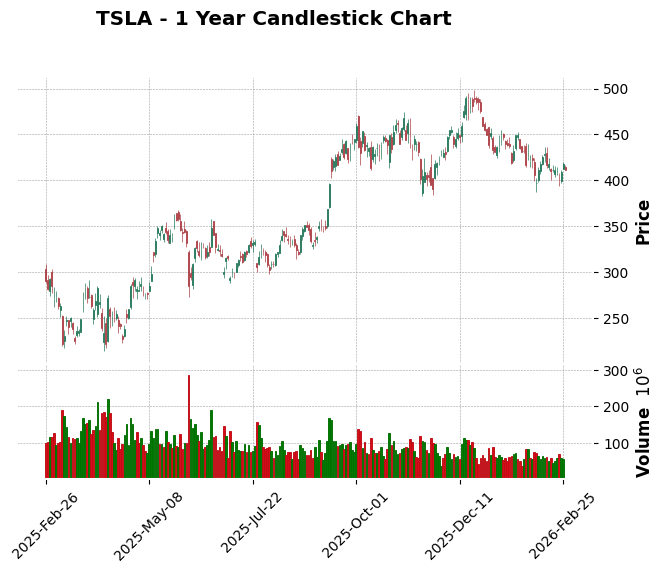


Plotting GOOGL...


[*********************100%***********************]  1 of 1 completed


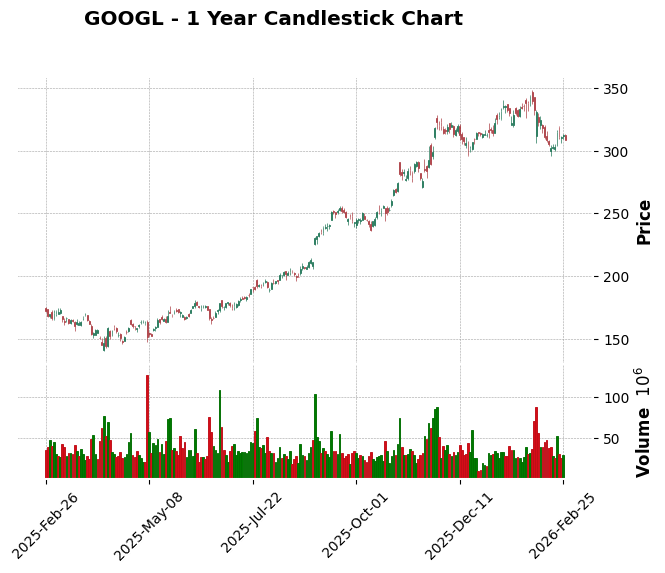

In [3]:
import yfinance as yf
import mplfinance as mpf  # type: ignore

tickers = ["AAPL", "TSLA", "GOOGL"]

for ticker in tickers:
    print(f"\nPlotting {ticker}...")

    data = yf.download(ticker, period="1y")

    # Fix MultiIndex columns (sometimes needed)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)

    mpf.plot(
        data,
        type='candle',
        style='charles',
        volume=True,
        title=f"{ticker} - 1 Year Candlestick Chart"
    )

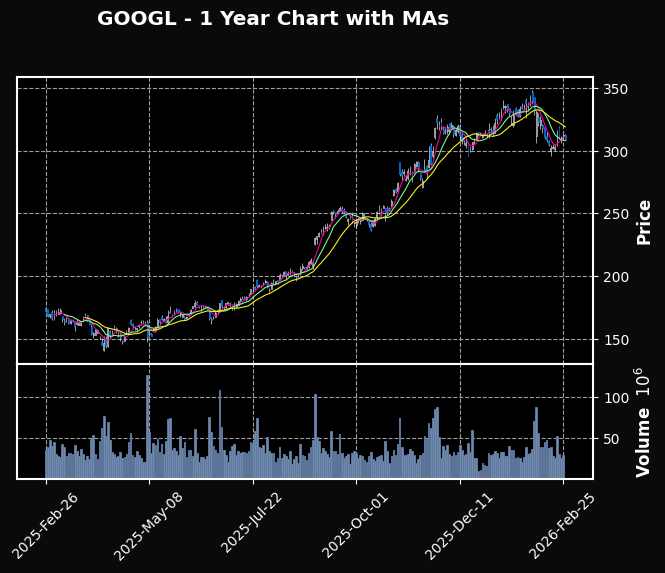

In [5]:
mpf.plot(
    data,
    type='candle',
    style='mike',
    volume=True,
    mav=(5, 10, 20),
    title=f"{ticker} - 1 Year Chart with MAs"
)